# Multiple Linear Regression Answer

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('advertising.csv')

### EDA - Exploratory Data Analysis

In [4]:
df.head(3)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3


In [6]:
df.shape

(200, 4)

In [7]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
df.sample(5)

,TV,Radio,Newspaper,Sales
151,121.0,8.4,48.7,11.6
180,156.6,2.6,8.3,10.5
160,172.5,18.1,30.7,14.4
137,273.7,28.9,59.7,20.8
164,117.2,14.7,5.4,11.9


In [12]:
df.describe() #Istatistik verilerini gorelim

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [13]:
df.corr(numeric_only=True) # Correlation verilerini gorelim

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

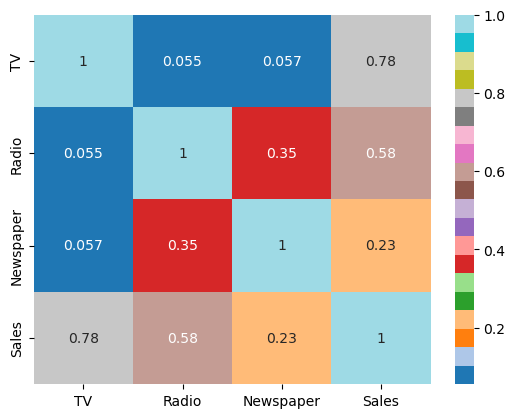

In [16]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='tab20') # Correlation verilerini sicaklik haritasinda verir

In [22]:
abs(df.corr(numeric_only=True)['Sales'].sort_values(ascending=False)) # TV ilanlari satista etkili gibi gozukuyor

Sales        1.000000
TV           0.782224
Radio        0.576223
Newspaper    0.228299
Name: Sales, dtype: float64

In [26]:
x = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.15, random_state=42)

In [28]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [29]:
y_pred = model.predict(x_test)

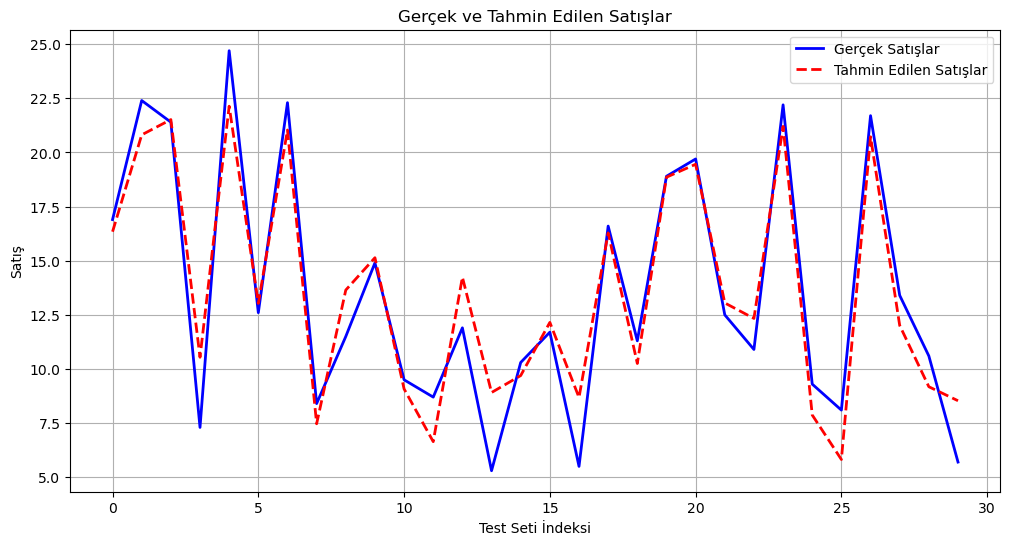

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Gerçek Satışlar', color='blue', linewidth=2)
plt.plot(y_pred, label='Tahmin Edilen Satışlar', color='red', linestyle='--', linewidth=2)
plt.title('Gerçek ve Tahmin Edilen Satışlar')
plt.xlabel('Test Seti İndeksi')
plt.ylabel('Satış')
plt.legend()
plt.grid()
plt.show()